#  House Price Prediction with Ames Data Set

### Importing Libraries

In [1]:
import pandas as pd                                            # for working with data in Python
import numpy as np                                             # for mathematical functions
import matplotlib.pyplot as plt                                # for visualization
import seaborn as sns                                          # for visualization 
from sklearn.model_selection import train_test_split           # to split train and test data
from sklearn.metrics import mean_squared_error                 # To validate the maodel
from sklearn import linear_model                               # To create model
plt.rcParams['figure.figsize'] = (10, 6)                       # Common figure size for all charts
pd.options.display.max_columns = None                          #To display all the columns of the dataset

### Gathering Data

In [2]:
train = pd.read_csv('train.csv')                               # Training Dataset
test = pd.read_csv('test.csv')                                 # Testing Dataset to predict the House Price
train.shape,test.shape

((1460, 81), (1459, 80))

In [3]:
data = pd.concat((train,test),sort=False).interpolate().reset_index(drop=True)
data.shape

(2919, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Data Pre Processing


### Assessing the Data

In [5]:
data.SalePrice.describe()

count      2919.000000
mean     164216.322713
std       58607.980516
min       34900.000000
25%      147500.000000
50%      147500.000000
75%      163000.000000
max      755000.000000
Name: SalePrice, dtype: float64

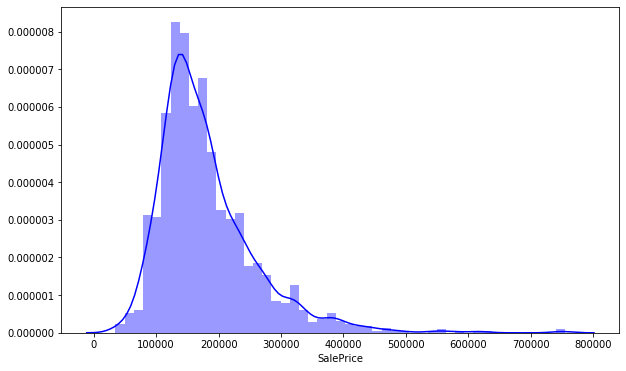

In [6]:
sns.distplot(train['SalePrice'], color='blue')

In [7]:
print("Skewness: {:.2f}".format(train.SalePrice.skew()))
print("Kurtness: {:.2f}".format(train.SalePrice.kurt()))

Skewness: 1.88
Kurtness: 6.54


Our Target variable is right skewed, we need to convert it to normal distributione to apply it in a model

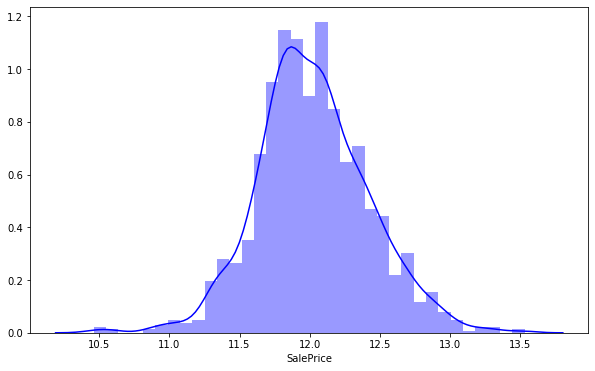

In [8]:
target = np.log(train.SalePrice)
sns.distplot(target, color='blue');

In [9]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [10]:
numeric_features.shape

(2919, 38)

In [11]:
corr = numeric_features.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.022394,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.024543,-0.017160,0.018170,-0.014452,-0.025172,-0.008678,-0.022252,-0.037816,-0.029046,-0.000062,0.010785,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.035100,-0.010956,-0.009747,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.254399
MSSubClass,0.008931,1.000000,-0.386549,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005065,-0.064054,-0.072431,-0.125978,-0.219619,-0.248641,0.309309,0.026482,0.071677,0.010151,-0.002336,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.061571,-0.046747,-0.103527,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.058445
LotFrontage,-0.022394,-0.386549,1.000000,0.347498,0.193052,-0.065205,0.110404,0.071887,0.190406,0.191549,0.051051,0.095919,0.313225,0.404848,0.022533,0.014592,0.334322,0.096859,-0.027122,0.151928,0.038194,0.212621,0.001103,0.310894,0.227360,0.070783,0.282850,0.325925,0.098912,0.139442,-0.000981,0.018554,0.074500,0.146694,0.027907,0.016680,-0.012478,0.225117
LotArea,-0.040746,-0.201730,0.347498,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124998,0.194148,0.084107,0.021361,0.254260,0.332460,0.031515,0.000554,0.284519,0.126510,0.025450,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.002817,0.180428,0.213204,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.238916
OverallQual,-0.029771,0.033638,0.193052,0.100541,1.000000,-0.093847,0.597554,0.571532,0.429898,0.282082,-0.042605,0.275072,0.549483,0.479152,0.245596,-0.048393,0.575126,0.164594,-0.041530,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.551435,0.600838,0.565211,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.527909
OverallCond,-0.002839,-0.065625,-0.065205,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.135887,-0.050754,0.041359,-0.138163,-0.174344,-0.157418,0.005494,0.009048,-0.116569,-0.042407,0.084765,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.293757,-0.181919,-0.154306,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.049991
YearBuilt,-0.016581,0.034409,0.110404,0.024128,0.597554,-0.368477,1.000000,0.612235,0.312349,0.279747,-0.027507,0.130457,0.408674,0.310814,0.017588,-0.144191,0.242666,0.211599,-0.030737,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.806227,0.538493,0.481281,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.352932
YearRemodAdd,-0.050438,0.043315,0.071887,0.021612,0.571532,0.047654,0.612235,1.000000,0.196025,0.152493,-0.061959,0.165099,0.298455,0.242245,0.158985,-0.060371,0.316972,0.134629,-0.047286,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.630915,0.425382,0.376010,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.347801
MasVnrArea,-0.024543,0.005065,0.190406,0.124998,0.429898,-0.135887,0.312349,0.196025,1.000000,0.300544,-0.015670,0.091112,0.395484,0.393275,0.120455,-0.057844,0.401663,0.140260,0.014584,0.259767,0.192875,0.078824,-0.051121,0.277113,0.275357,0.249668,0.359143,0.371612,0.165836,0.145155,-0.110898,0.013554,0.064981,0.004484,0.044703,-0.001583,-0.018208,0.326778
BsmtFinSF1,-0.017160,-0.064054,0.191549,0.194148,0.282082,-0.050754,0.279747,0.152493,0.300544,1.000000,-0.054957,-0.477351,0.536587,0.458191,-0.162049,-0.065993,0.211924,0.638832,0.077886,0.081785,-0.007101,-0.113225,-0.086287,0.052545,0.293268,0.197550,0.255431,0.310254,0.223651,0.124333,-0.09959

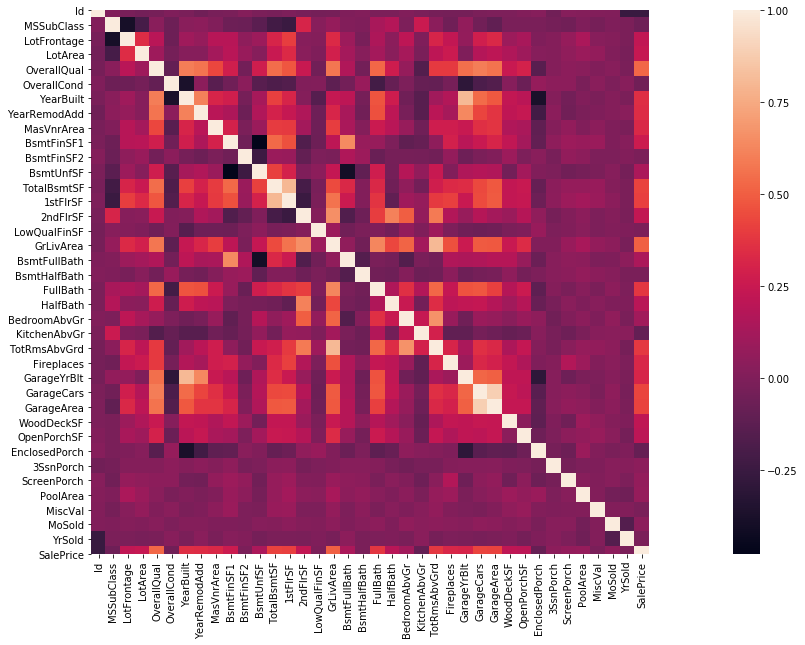

In [12]:
plt.figure(figsize=[30,10])
sns.heatmap(corr,square=True);

It is hard to find to correlation with all the parameters, Let's see which columns has high correlation.

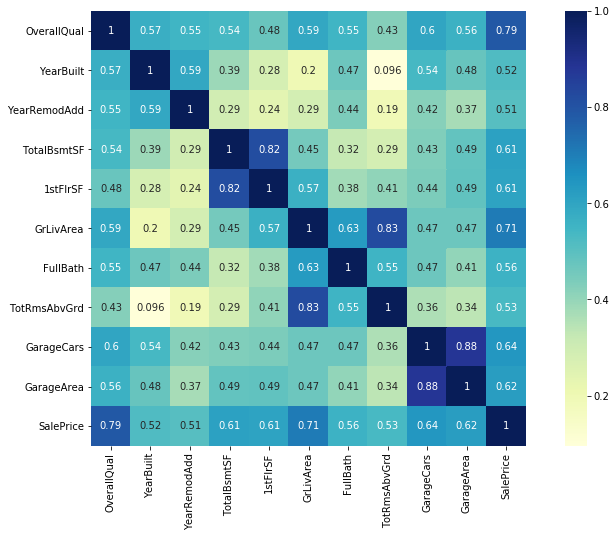

In [13]:
#Let's check which columns has correlation with SalePrice
cor_col = train.corr()
high_cor_col = cor_col.index[cor_col['SalePrice']>0.5]
plt.figure(figsize=(14,8))
ax =sns.heatmap(train[high_cor_col].corr(),annot=True, cmap='YlGnBu',square=True);
ax.set_ylim(11,0);

In [14]:
corr['SalePrice'].sort_values(ascending=False)[:5]

SalePrice      1.000000
OverallQual    0.527909
GrLivArea      0.506996
GarageCars     0.426101
GarageArea     0.419535
Name: SalePrice, dtype: float64

In [15]:
corr['SalePrice'].sort_values(ascending=False)[-15:]

BedroomAbvGr     0.115202
PoolArea         0.074608
ScreenPorch      0.069873
3SsnPorch        0.044315
MoSold           0.042778
LowQualFinSF    -0.011114
BsmtFinSF2      -0.012440
YrSold          -0.014804
BsmtHalfBath    -0.015689
MiscVal         -0.016246
OverallCond     -0.049991
MSSubClass      -0.058445
EnclosedPorch   -0.087986
KitchenAbvGr    -0.091921
Id              -0.254399
Name: SalePrice, dtype: float64

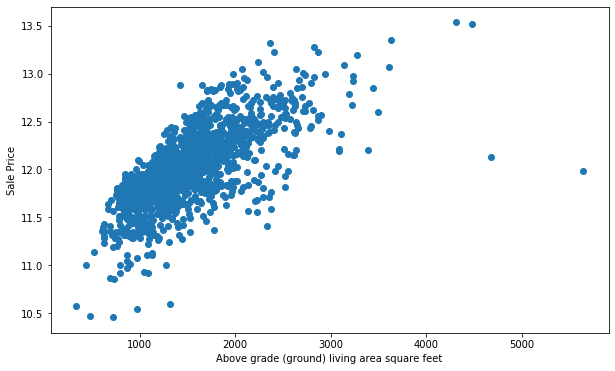

In [16]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet');

Text(0.5, 1.0, 'House Price Vs Ground Living Area')

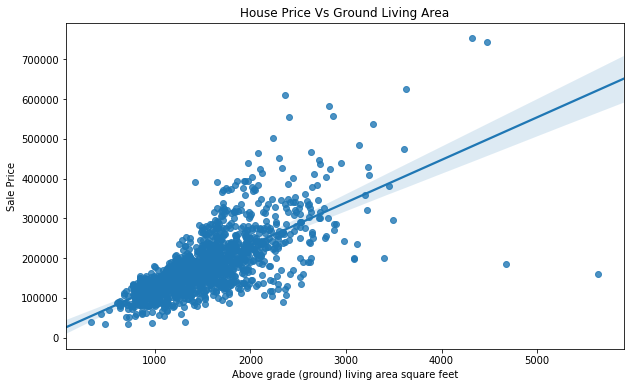

In [17]:
sns.regplot( x = train.GrLivArea, y = train.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet');
plt.title('House Price Vs Ground Living Area')

Text(0.5, 1.0, 'House Price Vs Garage Area')

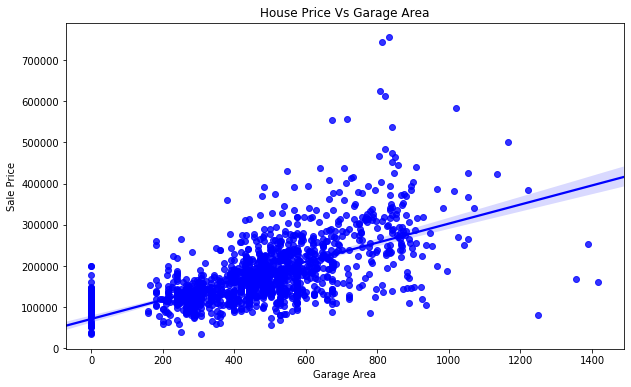

In [18]:
sns.regplot( x = train.GarageArea, y = train.SalePrice, color='blue')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area');
plt.title('House Price Vs Garage Area')

Text(0.5, 1.0, 'House Price Vs First Floor Square Feet')

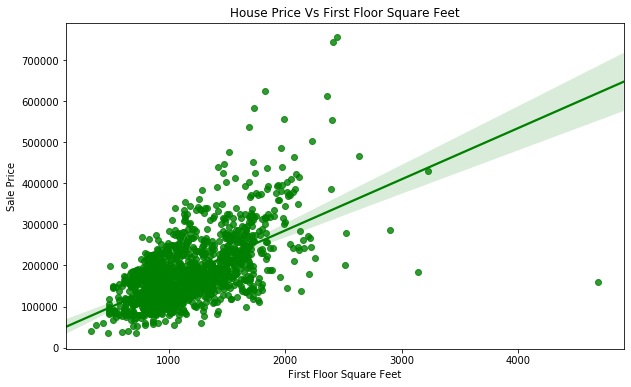

In [19]:
sns.regplot( x = train['1stFlrSF'], y = train.SalePrice, color='green')
plt.ylabel('Sale Price')
plt.xlabel('First Floor Square Feet');
plt.title('House Price Vs First Floor Square Feet')

Text(0.5, 1.0, 'House Price Vs Full bathrooms above grade')

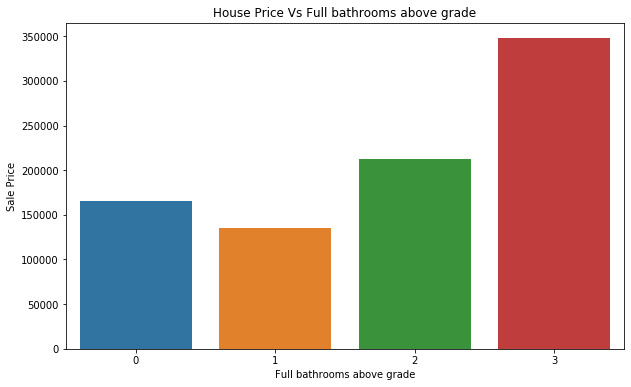

In [20]:
sns.barplot( x=train.FullBath,y =train.SalePrice,ci=0)
plt.ylabel('Sale Price')
plt.xlabel('Full bathrooms above grade');
plt.title('House Price Vs Full bathrooms above grade')

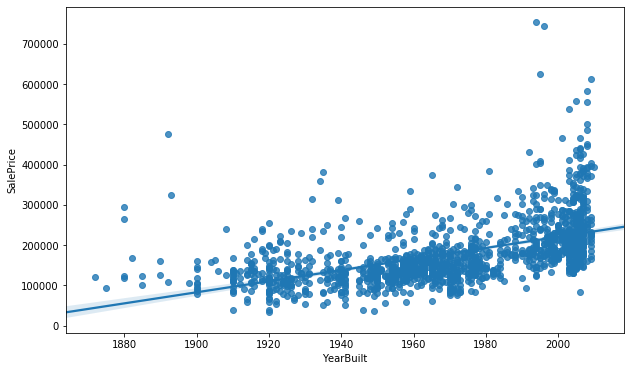

In [21]:
sns.regplot(train.YearBuilt,train.SalePrice)

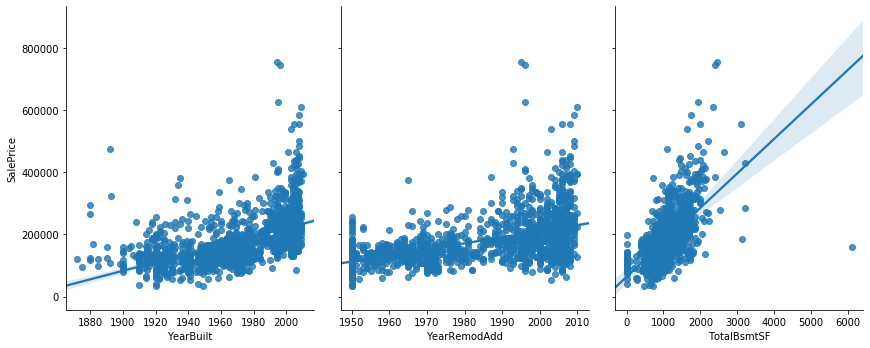

In [22]:
sns.pairplot(train, x_vars=['YearBuilt','YearRemodAdd','TotalBsmtSF'], 
             y_vars='SalePrice',kind='reg',aspect= 0.8, height=5);

### Cleaning the Data

In [23]:
train[train.GarageArea > 1200].index

Int64Index([581, 825, 1061, 1190, 1298], dtype='int64')

#### Outlier Removal

In [24]:
index = [581, 825, 1061, 1190, 1298]
data = data.drop(index=index)
target = target.drop(index=index)
data.shape,target.shape

((2914, 81), (1455,))

In [25]:
train[train.GrLivArea > 4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [26]:
data.loc[1290:1299]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1290,1291,80,RL,53.5,14112,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,7,1964,1964,Hip,CompShg,Wd Sdng,HdBoard,BrkFace,86.0,TA,TA,PConc,TA,TA,Av,GLQ,1014.0,Unf,0.0,138.0,1152.0,GasA,TA,Y,SBrkr,1152,0,0,1152,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1964.0,RFn,2.0,484.0,TA,TA,Y,227,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180500.0
1291,1292,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,BrkFace,268.0,TA,TA,CBlock,TA,TA,No,ALQ,231.0,Unf,0.0,399.0,630.0,GasA,TA,Y,SBrkr,630,672,0,1302,0.0,0.0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1972.0,Unf,1.0,264.0,TA,TA,Y,185,0,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,119500.0
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,TA,N,SBrkr,1378,994,0,2372,0.0,0.0,2,0,4,2,TA,11,Min2,0,NaN,Attchd,1985.0,RFn,1.0,432.0,TA,TA,Y,0,287,0,0,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500.0
1293,1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,194.0,Unf,0.0,638.0,832.0,GasA,TA,Y,SBrkr,832,832,0,1664,0.0,0.0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1976.0,RFn,2.0,528.0,TA,TA,Y,0,28,0,0,259,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900.0
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167.0,Unf,0.0,697.0,864.0,GasA,TA,Y,SBrkr,864,0,0,864,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2.0,572.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000.0
1295,1296,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,BrkFace,168.0,TA,TA,CBlock,TA,TA,Av,BLQ,1016.0,Unf,0.0,36.0,1052.0,GasA,Gd,Y,SBrkr,1052,0,0,1052,1.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1968.0,RFn,1.0,288.0,TA,TA,Y,356,0,0,0,0,0,NaN,GdWo,NaN,0,11,2006,WD,Normal,138500.0
1296,1297,20,RL,80.0,8700,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,148.0,TA,Gd,CBlock,TA,TA,Mn,ALQ,776.0,Unf,0.0,344.0,1120.0,GasA,Gd,Y,SBrkr,1128,0,0,1128,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,2.0,525.0,TA,TA,Y,192,20,123,0,0,0,NaN,MnPrv,NaN,0,12,2008,WD,Normal,155000.0
1297,1298,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,Partial,140000.0
1299,1300,20,RL,75.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1994,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,340.0,Rec,906.0,0.0,1246.0,GasA,Ex,Y,SBrkr,1246,0,0,1246,1.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1959.0,RFn,1.0,305.0,TA,TA,Y,218,0,0,0,0,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal,154000.0


In [27]:
index=[523]
data = data.drop(index=index)
target = target.drop(index=index)
data.shape,target.shape,train.shape

((2913, 81), (1454,), (1460, 81))

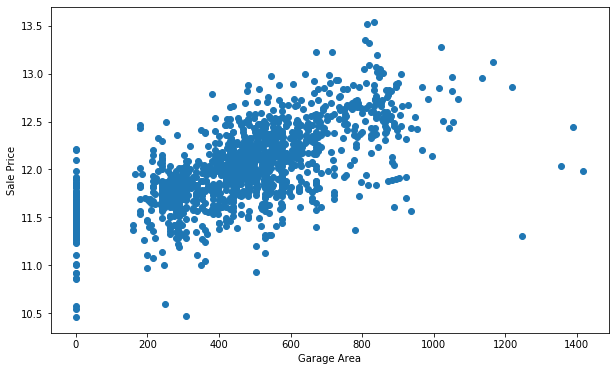

In [28]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area');

#### Imputing Missing Values

In [29]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:23])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls = nulls.reset_index()
nulls

,Feature,Null Count
0,PoolQC,2904
1,MiscFeature,2809
2,Alley,2715
3,Fence,2342
4,FireplaceQu,1419
5,GarageFinish,159
6,GarageQual,159
7,GarageCond,159
8,GarageType,157
9,BsmtCond,82


In [30]:
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
data.shape

(2913, 76)

In [31]:
data['Electrical'] = data['Electrical'].transform(lambda x:x.fillna(x.mode()[0]))
for feat in nulls.Feature[5:]:
    data[feat] = data[feat].transform(lambda x: x.fillna('None'))
data.shape

(2913, 76)

In [32]:
data.isnull().sum()[data.isnull().sum()!=0]

Series([], dtype: int64)

### Feature Engineering

In [33]:
final_feat = pd.get_dummies(data,drop_first=True)
final_feat.shape

(2913, 249)

In [34]:
final_feat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_None,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_None,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0

In [35]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [36]:
target.shape

(1454,)

In [37]:
y = target
X = final_feat.iloc[:target.shape[0]]
x_act_test = final_feat.iloc[target.shape[0]:]

In [38]:
X.shape,y.shape,x_act_test.shape

((1454, 249), (1454,), (1459, 249))

In [39]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
x_act_test = x_act_test.drop(overfitted_features, axis=1)
X.shape,x_act_test.shape

((1454, 241), (1459, 241))

#### Spiliting the Data for Training and Testing

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((974, 241), (480, 241), (974,), (480,))

#### Initializing a Linear Regression Model

In [42]:
lr = linear_model.LinearRegression()

In [43]:
mod = lr.fit(X_train,y_train)
mod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print("R^2 is: \n", mod.score(X_test, y_test))

R^2 is: 
 0.9350759015388337


In [45]:
predictions = mod.predict(X_test)

In [46]:
print("Original Test are: \n", np.exp(y_test[:10]), "\n")
print("Predictied Test are: \n", np.exp(predictions[:10]))

Original Test are: 
 497     184000.0
1265    183900.0
411     145000.0
1183    120000.0
1036    315500.0
615     137500.0
218     311500.0
1185    104900.0
1195    176000.0
888     268000.0
Name: SalePrice, dtype: float64 

Predictied Test are: 
 [175568.87645216 186161.98981475 124050.4756866  128391.39300218
 307221.40268124 142997.68260862 319048.53752156 118328.211682
 173282.67032074 314868.08280536]


In [47]:
y_test.shape,predictions.shape

((480,), (480,))

In [48]:
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.010490092439993002


In [49]:
predictions_test = mod.predict(x_act_test)

In [50]:
predictions_test.shape

(1459,)

In [51]:
np.exp(predictions_test[:10])

array([129717.89379949,  82310.34493187, 161048.79570454, 172584.94960977,
       163022.0220426 , 156599.92617052, 160003.44746806, 156614.20567864,
       158028.04734109, 130705.03081057])

In [52]:
np.exp(y_test[:10])

497     184000.0
1265    183900.0
411     145000.0
1183    120000.0
1036    315500.0
615     137500.0
218     311500.0
1185    104900.0
1195    176000.0
888     268000.0
Name: SalePrice, dtype: float64

In [53]:
print("R^2 is: \n", mod.score(X_test, y_test))

R^2 is: 
 0.9350759015388337


#### Initializing XGBoost Algorthim Regressor

In [54]:
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [55]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [56]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [57]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   35.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 10.9min finished
C:\Users\rk000u\AppData\Local\Continuum\anaconda3\envs\ML\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:32:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [58]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [60]:
regressor.fit(X_train,y_train)

[22:32:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [61]:
pred_data_test = regressor.predict(X_test)
np.exp(pred_data_test)

array([184605.17 , 185095.97 , 145406.3  , 119624.04 , 314977.47 ,
       136584.33 , 315070.   , 104754.7  , 177786.36 , 268405.88 ,
       135063.89 , 118866.55 , 213413.64 , 213713.64 ,  52879.777,
        84952.92 , 184356.94 , 141560.33 , 220246.08 , 226497.28 ,
       155775.33 , 279697.47 , 173677.72 , 351566.44 , 192046.36 ,
       152737.31 , 114635.984, 140798.4  , 143387.12 , 136788.86 ,
       127575.55 , 439104.5  , 145740.31 , 136127.11 , 109980.35 ,
       140154.95 , 220976.97 , 160753.6  , 249417.31 ,  96582.08 ,
       114486.74 , 204043.89 , 135041.23 ,  77627.57 , 128883.664,
       213390.03 , 106941.69 , 127513.875, 164625.56 , 110070.38 ,
       118795.266,  93985.99 , 225231.16 ,  61237.28 , 177385.33 ,
       260589.39 , 133890.95 , 172490.4  , 106950.87 , 150805.2  ,
        66260.414, 132312.53 , 318378.94 , 318613.75 , 215085.2  ,
       245352.42 , 249841.08 ,  65673.4  , 203825.88 , 177933.6  ,
       106897.84 ,  88317.35 , 135168.27 , 110152.6  , 116355.

In [62]:
np.exp(y_test)

497     184000.0
1265    183900.0
411     145000.0
1183    120000.0
1036    315500.0
          ...   
1027    293077.0
390     119000.0
601     141000.0
848     240000.0
1256    301500.0
Name: SalePrice, Length: 480, dtype: float64

In [63]:
print("R^2 is: \n", mod.score(X_test, y_test))

R^2 is: 
 0.9350759015388337


In [64]:
print('RMSE is: \n', mean_squared_error(y_test, pred_data_test))

RMSE is: 
 0.00033825810170981085


In [65]:
pred_test = regressor.predict(x_act_test)
pred_test

array([11.899326 , 11.898567 , 11.8990555, ..., 11.899358 , 11.895253 ,
       11.899287 ], dtype=float32)

In [66]:
submission = pd.DataFrame()
submission['Id'] = test.Id


In [67]:
final_predictions = np.exp(pred_test)

In [68]:
print("Original predictions are: \n", np.exp(predictions[:10]), "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [175568.87645216 186161.98981475 124050.4756866  128391.39300218
 307221.40268124 142997.68260862 319048.53752156 118328.211682
 173282.67032074 314868.08280536] 

Final predictions are: 
 [147167.45 147055.77 147127.6  146856.34 147255.61 147285.11 147536.89
 146929.47 147121.28 147113.56]


In [69]:
submission['SalePrice'] = final_predictions
submission.tail()

,Id,SalePrice
1454,2915,146793.187500
1455,2916,147096.171875
1456,2917,147172.078125
1457,2918,146569.234375
1458,2919,147161.687500


In [70]:
submission.to_csv('submission_v14.csv', index=False) 

#### Initializing Random Forest Algorithm

In [71]:
from sklearn.ensemble import RandomForestRegressor 
regressor_1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_1.fit(X, y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [72]:
y_pred_rf = regressor_1.predict(x_act_test)
y_pred_rf

array([11.90101083, 11.901045  , 11.90070106, ..., 11.90109885,
       11.90096285, 11.90058563])

In [73]:
final_predictions_rf = np.exp(pred_test)
final_predictions_rf 

array([147167.45, 147055.77, 147127.6 , ..., 147172.08, 146569.23,
       147161.69], dtype=float32)

In [74]:
submission['SalePrice'] = final_predictions_rf
submission.tail()

,Id,SalePrice
1454,2915,146793.187500
1455,2916,147096.171875
1456,2917,147172.078125
1457,2918,146569.234375
1458,2919,147161.687500


In [75]:
submission.to_csv('submission_v15.csv', index=False)